In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor



import datetime as dt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

In [2]:
netflix = pd.read_csv("Netflix.csv")
amazon = pd.read_csv("Amazon.csv")
google = pd.read_csv("Google.csv")
apple = pd.read_csv("Apple.csv")
microsoft = pd.read_csv("Microsoft.csv")

In [69]:
netflix.head()

,Open,High,Low,Close,Adj Close,Volume,year,month,day
Date,,,,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000,2002,5,23
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800,2002,5,24
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400,2002,5,28
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800,2002,5,29
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200,2002,5,30


In [41]:
netflix_ml["Adj Close"]

Date
2002-05-23      1.196429
2002-05-24      1.210000
2002-05-28      1.157143
2002-05-29      1.103571
2002-05-30      1.071429
                 ...    
2023-03-13    293.510010
2023-03-14    294.940002
2023-03-15    303.790009
2023-03-16    310.059998
2023-03-17    303.500000
Name: Adj Close, Length: 5241, dtype: float64

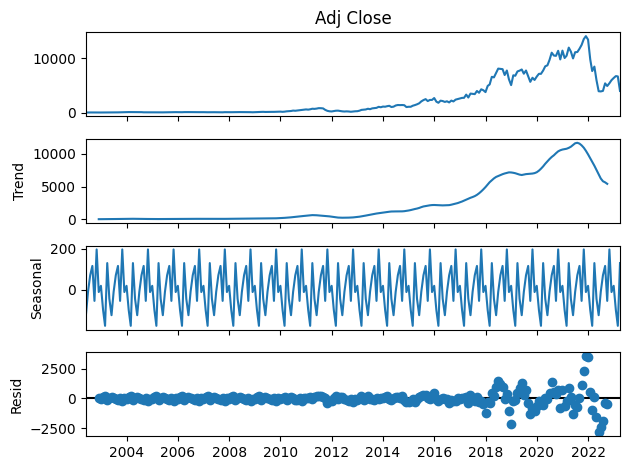

In [45]:
temp = netflix_ml["Adj Close"].resample("M").sum()

decompostision = sm.tsa.seasonal_decompose(temp, model = "additive")
fig = decompostision.plot()
plt.show()

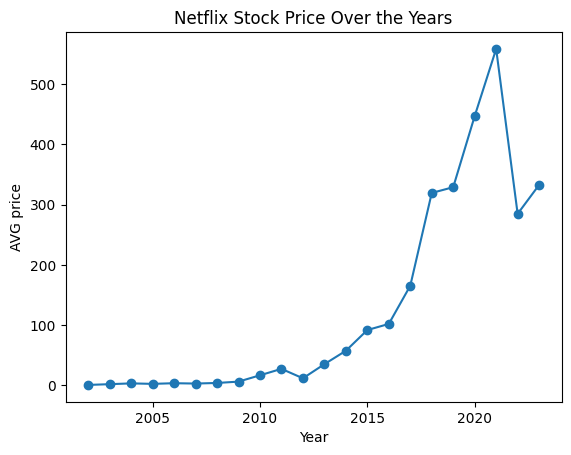

Mean per Year (Netflix):
year
2002      0.850172
2003      2.081205
2004      3.413430
2005      2.597262
2006      3.690996
2007      3.123933
2008      4.094670
2009      6.322035
2010     16.824172
2011     27.493719
2012     11.855057
2013     35.271831
2014     57.495119
2015     91.895674
2016    102.030357
2017    165.374263
2018    319.290319
2019    328.872380
2020    446.827233
2021    558.217697
2022    284.639244
2023    332.638654
Name: Adj Close, dtype: float64


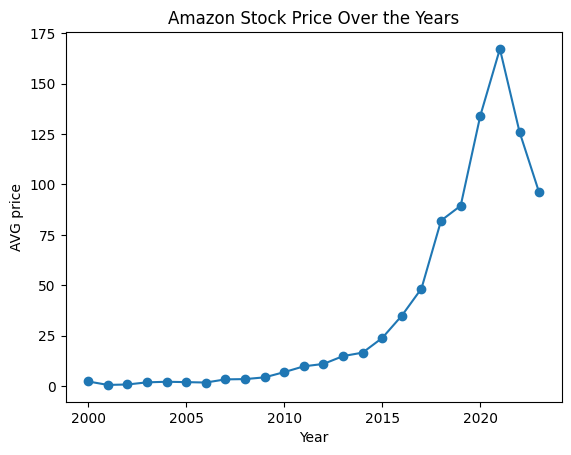

Mean per Year (Amazon):
year
2000      2.326683
2001      0.610021
2002      0.824206
2003      1.887069
2004      2.178262
2005      1.994855
2006      1.795466
2007      3.361474
2008      3.494002
2009      4.364091
2010      6.957020
2011      9.833601
2012     11.015182
2013     14.901579
2014     16.627552
2015     23.906915
2016     34.976157
2017     48.408351
2018     82.086309
2019     89.459460
2020    134.042755
2021    167.193349
2022    126.098819
2023     96.066154
Name: Adj Close, dtype: float64


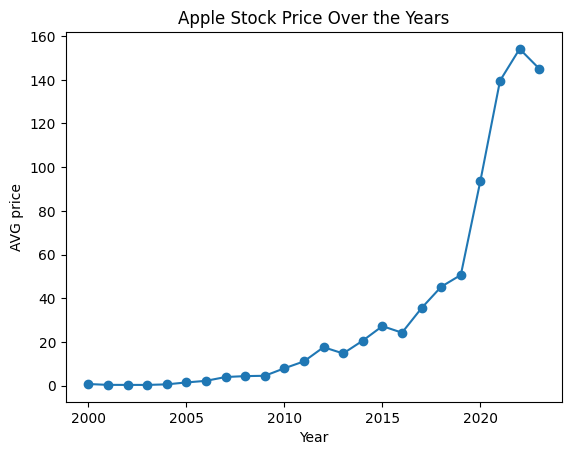

Mean per Year (Apple):
year
2000      0.694754
2001      0.307306
2002      0.290892
2003      0.281853
2004      0.539958
2005      1.418815
2006      2.152437
2007      3.899153
2008      4.315748
2009      4.462721
2010      7.898453
2011     11.064670
2012     17.552720
2013     14.691350
2014     20.561008
2015     27.208125
2016     24.200999
2017     35.488176
2018     45.243090
2019     50.625064
2020     93.773217
2021    139.587720
2022    154.146562
2023    145.091620
Name: Adj Close, dtype: float64


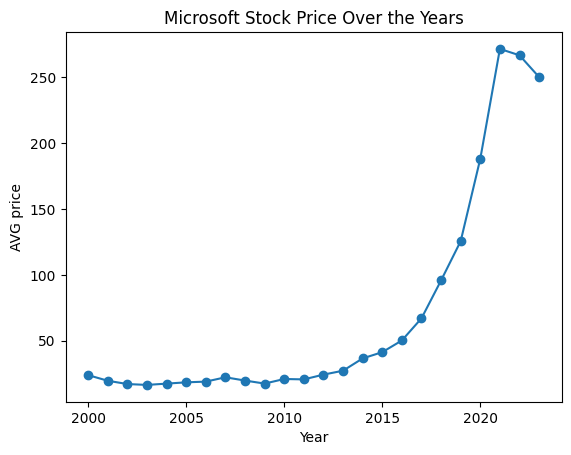

Mean per Year (Microsoft):
year
2000     23.776914
2001     19.509977
2002     17.016528
2003     16.350573
2004     17.347157
2005     18.317636
2006     18.862766
2007     22.153752
2008     19.657656
2009     17.375033
2010     20.850474
2011     20.556355
2012     24.173227
2013     27.158780
2014     36.513983
2015     41.248367
2016     50.136766
2017     66.956333
2018     95.782166
2019    125.620815
2020    188.245292
2021    271.712492
2022    266.873975
2023    250.298173
Name: Adj Close, dtype: float64


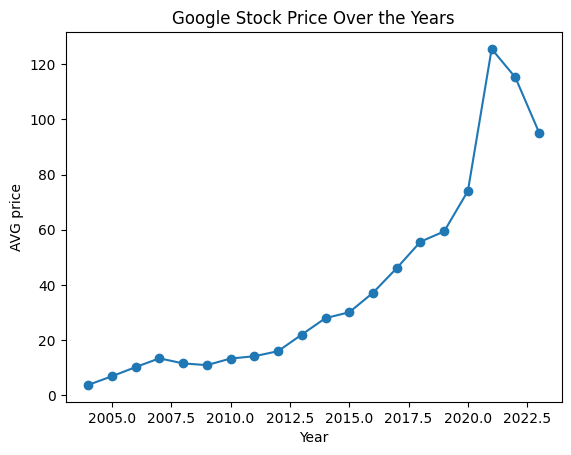

Mean per Year (Google):
year
2004      3.780860
2005      6.918047
2006     10.241246
2007     13.418465
2008     11.577904
2009     10.951161
2010     13.340574
2011     14.171237
2012     16.010401
2013     22.023519
2014     27.990164
2015     30.100284
2016     37.174335
2017     46.089042
2018     55.661257
2019     59.419653
2020     74.070191
2021    125.530687
2022    115.193719
2023     95.203654
Name: Adj Close, dtype: float64


In [3]:
def mean_per_time(df, date, price, stock_name):
    df[date] = pd.to_datetime(df[date])

    # mean per year
    df["year"] = df[date].dt.year
    mean_per_year = df.groupby("year")[price].mean()

    # mean per month
    df["month"] = df[date].dt.month
    mean_per_month = df.groupby("month")[price].mean()

    # date columns
    df['year'] = df[date].dt.year
    df['month'] = df[date].dt.month
    df['day'] = df[date].dt.day

    df = df.drop(columns=[date])

    plt.plot(mean_per_year.index, mean_per_year.values, marker="o", linestyle="-")
    plt.xlabel("Year")
    plt.ylabel("AVG price")
    plt.title(f"{stock_name} Stock Price Over the Years")
    plt.show()

    print(f"Mean per Year ({stock_name}):")
    print(mean_per_year)

    return mean_per_year

stocks = {"Netflix" : netflix,
    "Amazon": amazon,
    "Apple": apple,
    "Microsoft": microsoft, 
    "Google": google
}

for stock_name, stock_df in stocks.items():
    mean_per_year = mean_per_time(stock_df, "Date",  "Adj Close", stock_name)

#ML models

In [4]:
netflix_ml = pd.read_csv("Netflix.csv",parse_dates = ["Date"], index_col=["Date"])
amazon_ml = pd.read_csv("Amazon.csv",parse_dates = ["Date"], index_col=["Date"])
google_ml = pd.read_csv("Google.csv",parse_dates = ["Date"], index_col=["Date"])
apple_ml = pd.read_csv("Apple.csv",parse_dates = ["Date"], index_col=["Date"])
microsoft_ml = pd.read_csv("Microsoft.csv",parse_dates = ["Date"], index_col=["Date"])

In [5]:
netflix_price = netflix_ml["Adj Close"].resample("M").mean()
amazon_price = amazon_ml["Adj Close"].resample("M").mean()
google_price = google_ml["Adj Close"].resample("M").mean()
apple_price = apple_ml["Adj Close"].resample("M").mean()
microsoft_price = microsoft_ml["Adj Close"].resample("M").mean()

size = int(len(netflix_price)*0.80)
train = netflix_price[:size]
test = netflix_price[size:]


In [15]:
auto_arima(train, m=12, start_P=2, seasonal=True, d=1, trace=True, error_action="ignore", stepwise=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=20152.549, Time=48.09 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=20205.131, Time=0.12 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=20206.774, Time=1.31 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=20206.802, Time=1.97 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=20207.160, Time=0.08 sec
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=14.11 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=inf, Time=41.63 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=42.42 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=15.67 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=20153.473, Time=41.72 sec
 ARIMA(1,1,2)(2,0,1)[12] intercept   : AIC=20197.689, Time=23.92 sec
 ARIMA(2,1,1)(2,0,1)[12] intercept   : AIC=20199.050, Time=20.79 sec
 ARIMA(3,1,2)(2,0,1)[12] intercept   : AIC=20127.872, Time=45.18 sec
 ARIMA(3,1,2)(1,0,1)[12] intercept   : AIC=20127.199, Time=16.65 sec
 ARIMA(3,1,2)(0,0,1

ARIMA(order=(5, 1, 4), scoring_args={}, seasonal_order=(2, 0, 0, 12),
      suppress_warnings=True)

/Users/air/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


55.46165461401687


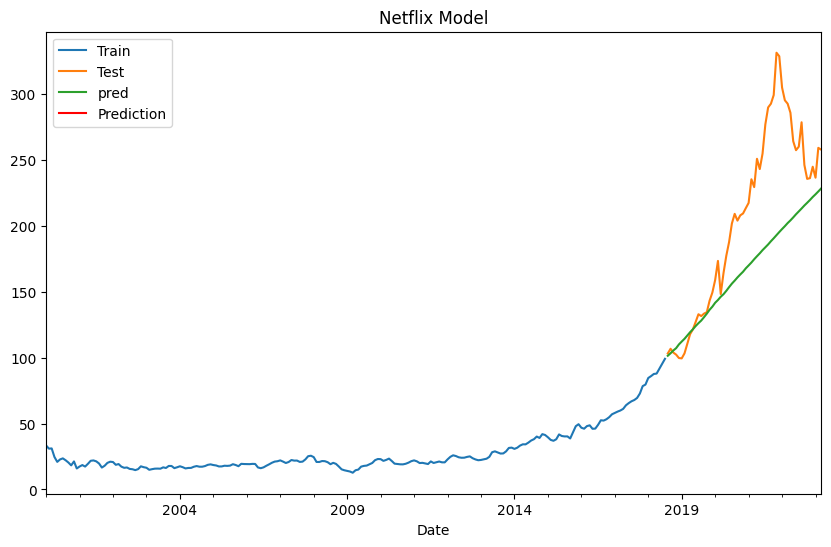

In [35]:
#now modeling
model = ARIMA(train, order = (5,1,4), seasonal_order=(2,0,0,12)).fit()

pred = model.predict(start=len(train), end=len(train) + len(test) - 1)


#  RMSE
print(np.sqrt(mean_squared_error(test, pred)))

# Plotting
plt.figure(figsize=(10, 6))
train.plot(legend=True, label="Train")
test.plot(legend=True, label="Test")
pred.plot(legend=True, label="pred")
plt.plot( test.index, pred, label="Prediction", color="red")
plt.title("Netflix Model")
#plt.fill_between(test.index, conf_int[:, 0], conf_int[:, 1], color="red", alpha=0.2)
plt.legend()
plt.show()

In [23]:
size = int(len(amazon_price)*0.80)
train = amazon_price[:size]
test = amazon_price[size:]

In [24]:
auto_arima(train, m=12, start_P=2, seasonal=True, d=1, trace=True, error_action="ignore", stepwise=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=inf, Time=3.87 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=783.450, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=750.371, Time=0.13 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=760.574, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=797.762, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=752.045, Time=0.06 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=751.253, Time=0.44 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=751.112, Time=0.65 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=751.152, Time=0.13 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=751.765, Time=1.36 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=785.436, Time=0.09 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=749.975, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=752.795, Time=0.09 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=751.870, Time=0.67 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   

ARIMA(order=(3, 1, 3), scoring_args={}, seasonal_order=(0, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

/Users/air/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


48.9447932749821


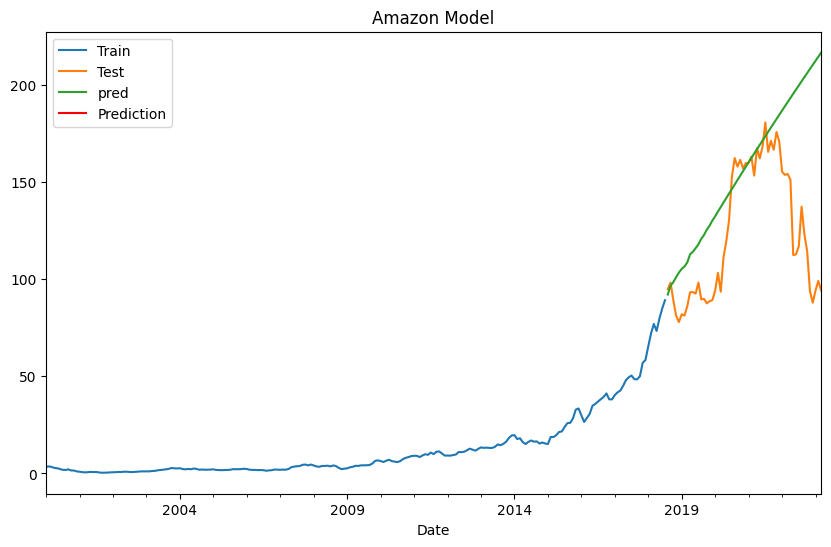

In [25]:
model = ARIMA(train, order = (3,1,3), seasonal_order=(0,0,1,12)).fit()

pred = model.predict(start=len(train), end=len(train) + len(test) - 1)


#  RMSE
print(np.sqrt(mean_squared_error(test, pred)))

# Thee results
plt.figure(figsize=(10, 6))
train.plot(legend=True, label="Train")
test.plot(legend=True, label="Test")
pred.plot(legend=True, label="pred")
plt.plot( test.index, pred, label="Prediction", color="red")
plt.title("Amazon Model")
#plt.fill_between(test.index, conf_int[:, 0], conf_int[:, 1], color="red", alpha=0.2)
plt.legend()
plt.show()

In [26]:
size = int(len(apple_price)*0.80)
train = apple_price[:size]
test = apple_price[size:]

auto_arima(train, m=12, start_P=2, seasonal=True, d=1, trace=True, error_action="ignore", stepwise=True, suppress_warnings=True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=576.838, Time=5.17 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=579.722, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=575.779, Time=0.19 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=574.894, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=588.951, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=576.237, Time=0.07 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=575.829, Time=0.33 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=574.049, Time=0.50 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=575.423, Time=0.84 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=577.677, Time=0.37 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=575.976, Time=1.79 sec
 ARIMA(0,1,2)(0,0,2)[12] intercept   : AIC=575.994, Time=1.20 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=573.978, Time=0.94 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=574.829, Time=0.19 sec
 ARIMA(1,1,0)(1,0,2)[12] intercep

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(0, 0, 2, 12),
      suppress_warnings=True)

53.592897269154946


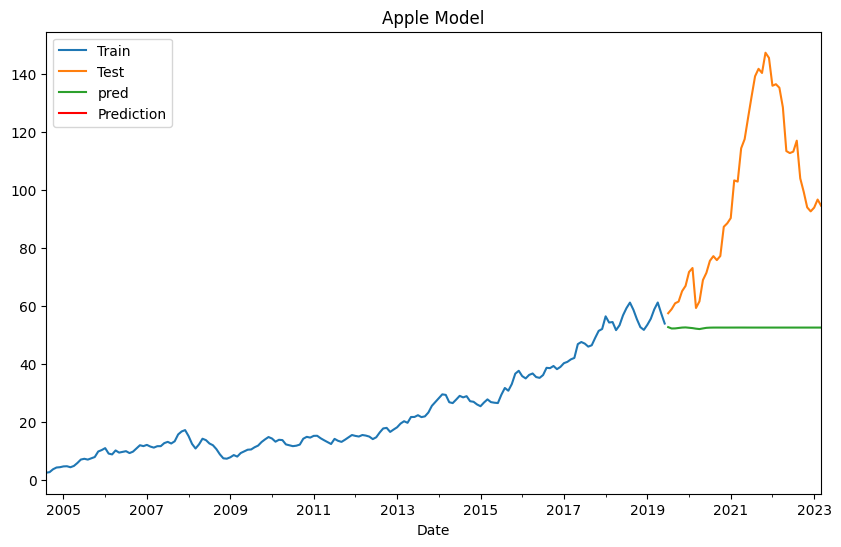

In [29]:
model = ARIMA(train, order = (1,1,0), seasonal_order=(0,0,2,12)).fit()

pred = model.predict(start=len(train), end=len(train) + len(test) - 1)


#  RMSE
print(np.sqrt(mean_squared_error(test, pred)))

# The results
plt.figure(figsize=(10, 6))
train.plot(legend=True, label="Train")
test.plot(legend=True, label="Test")
pred.plot(legend=True, label="pred")
plt.plot( test.index, pred, label="Prediction", color="red")
plt.title("Apple Model")
#plt.fill_between(test.index, conf_int[:, 0], conf_int[:, 1], color="red", alpha=0.2)
plt.legend()
plt.show()

In [28]:
size = int(len(google_price)*0.80)
train = google_price[:size]
test = google_price[size:]

auto_arima(train, m=12, start_P=2, seasonal=True, d=1, trace=True, error_action="ignore", stepwise=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=593.784, Time=3.35 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=622.004, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=607.771, Time=0.18 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=605.699, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=627.718, Time=0.03 sec
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=591.872, Time=2.12 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=589.893, Time=0.47 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=587.924, Time=0.30 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=589.894, Time=0.80 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=605.086, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=595.128, Time=0.49 sec
 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=594.539, Time=0.47 sec
 ARIMA(2,1,3)(0,0,0)[12] intercept   : AIC=594.221, Time=0.44 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=606.417, Time=0.11 sec
 ARIMA(1,1,3)(0,0,0)[12] intercep

ARIMA(order=(2, 1, 2), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True)

51.4366458376427


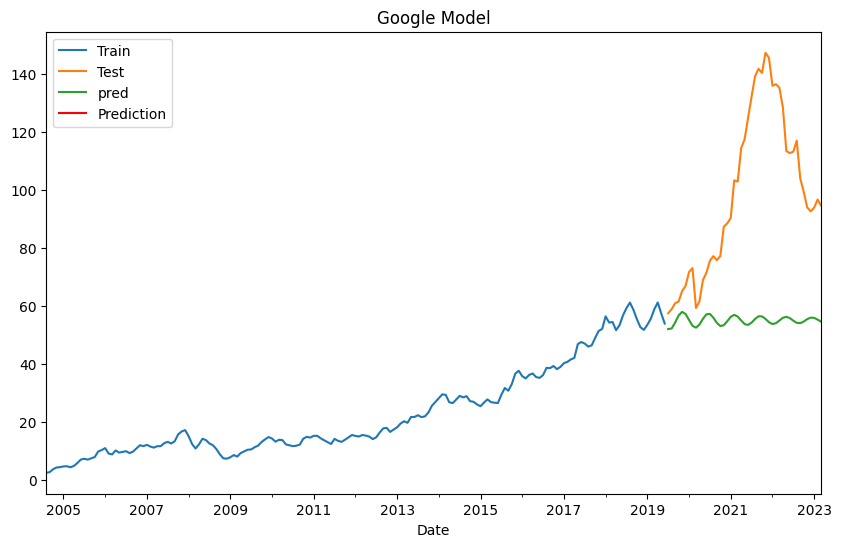

In [30]:
model = ARIMA(train, order = (2,1,2), seasonal_order=(0,0,0,12)).fit()

pred = model.predict(start=len(train), end=len(train) + len(test) - 1)


#  RMSE
print(np.sqrt(mean_squared_error(test, pred)))

# The results
plt.figure(figsize=(10, 6))
train.plot(legend=True, label="Train")
test.plot(legend=True, label="Test")
pred.plot(legend=True, label="pred")
plt.plot( test.index, pred, label="Prediction", color="red")
plt.title("Google Model")
#plt.fill_between(test.index, conf_int[:, 0], conf_int[:, 1], color="red", alpha=0.2)
plt.legend()
plt.show()

In [31]:
size = int(len(microsoft_price)*0.80)
train = microsoft_price[:size]
test = microsoft_price[size:]

auto_arima(train, m=12, start_P=2, seasonal=True, d=1, trace=True, error_action="ignore", stepwise=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=824.018, Time=6.44 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=848.562, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=833.645, Time=0.11 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=834.262, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=853.853, Time=0.03 sec
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=3.52 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=823.598, Time=6.85 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=823.581, Time=1.48 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=824.006, Time=0.80 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=824.242, Time=1.52 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=822.331, Time=0.85 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=822.656, Time=0.51 sec
 ARIMA(1,1,2)(2,0,0)[12] intercept   : AIC=830.720, Time=0.54 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=837.177, Time=0.74 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   

ARIMA(order=(1, 1, 4), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

63.37485655034853


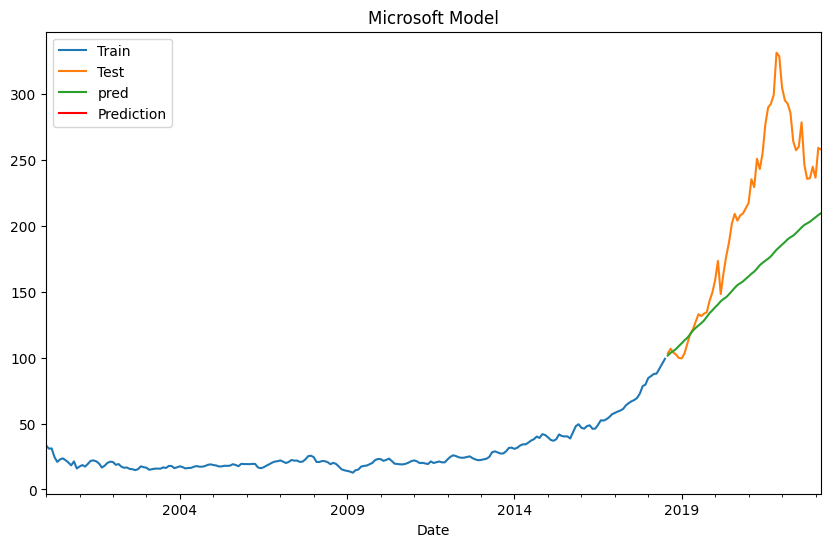

In [33]:
model = ARIMA(train, order = (1,1,4), seasonal_order=(1,0,1,12)).fit()

pred = model.predict(start=len(train), end=len(train) + len(test) - 1)


#  RMSE
print(np.sqrt(mean_squared_error(test, pred)))

# The results
plt.figure(figsize=(10, 6))
train.plot(legend=True, label="Train")
test.plot(legend=True, label="Test")
pred.plot(legend=True, label="pred")
plt.plot( test.index, pred, label="Prediction", color="red")
plt.title("Microsoft Model")
#plt.fill_between(test.index, conf_int[:, 0], conf_int[:, 1], color="red", alpha=0.2)
plt.legend()
plt.show()

/Users/air/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


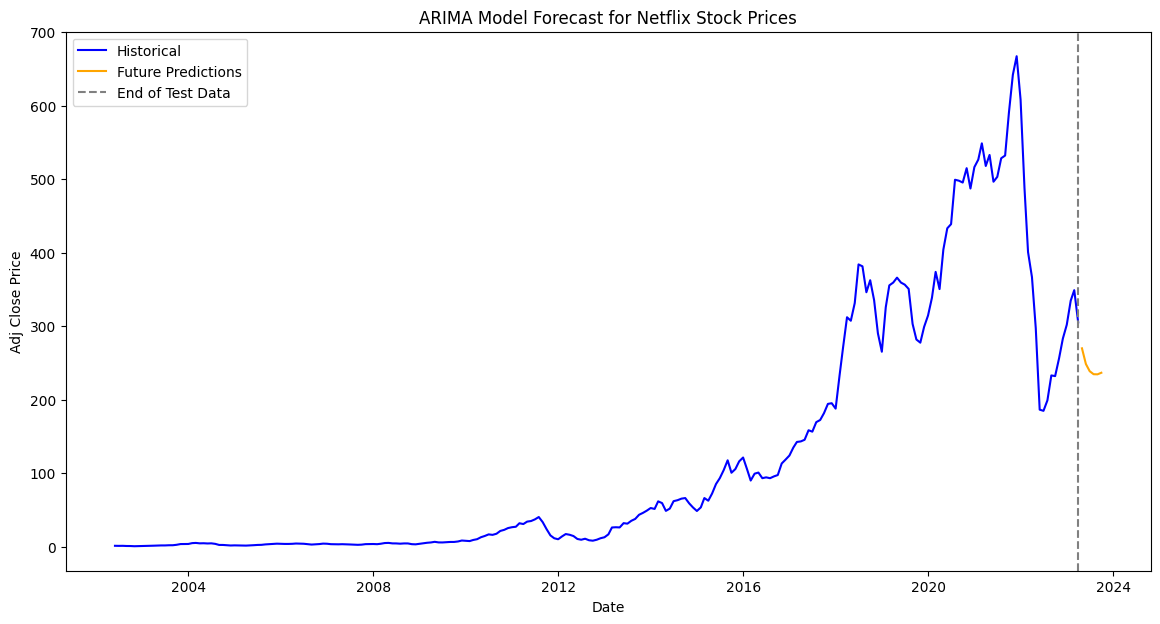

/Users/air/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


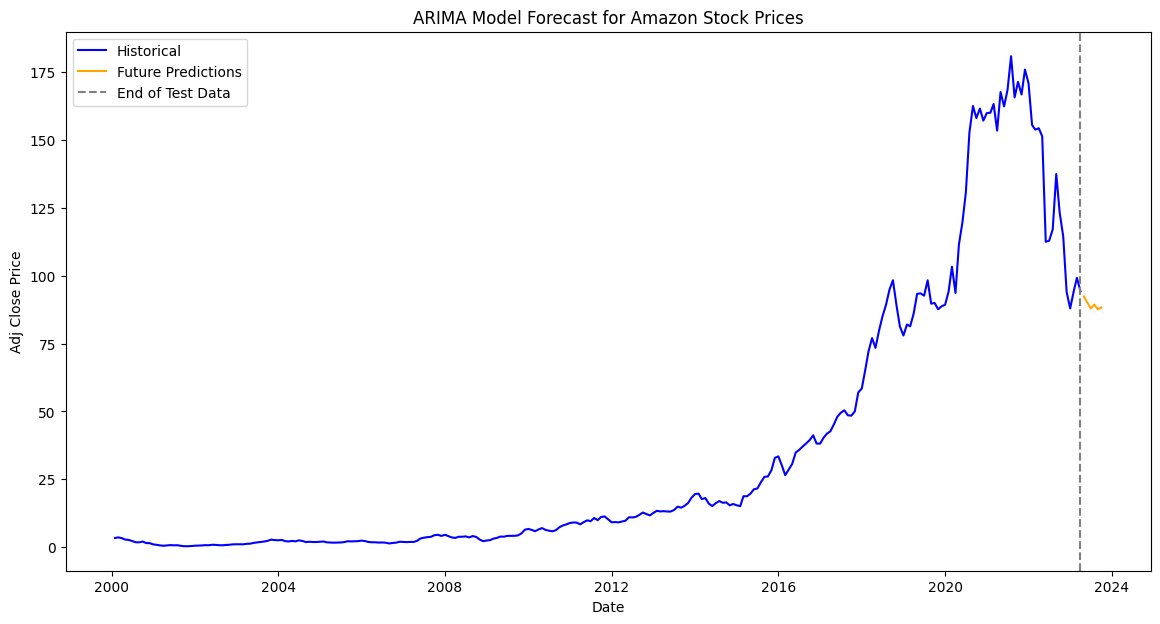

/Users/air/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


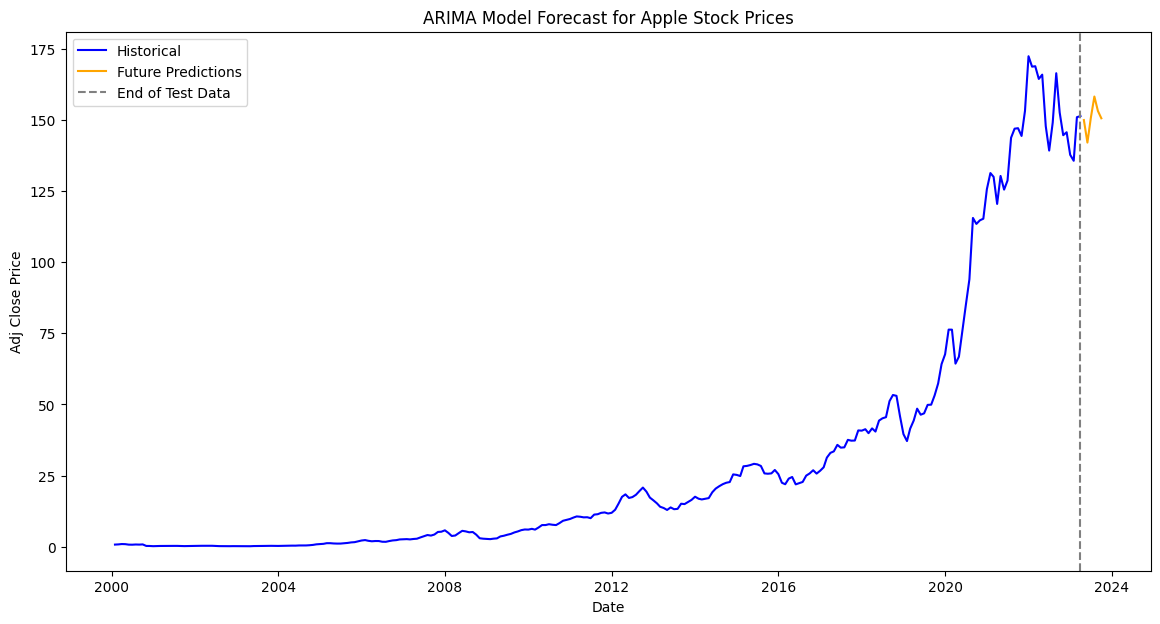

/Users/air/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


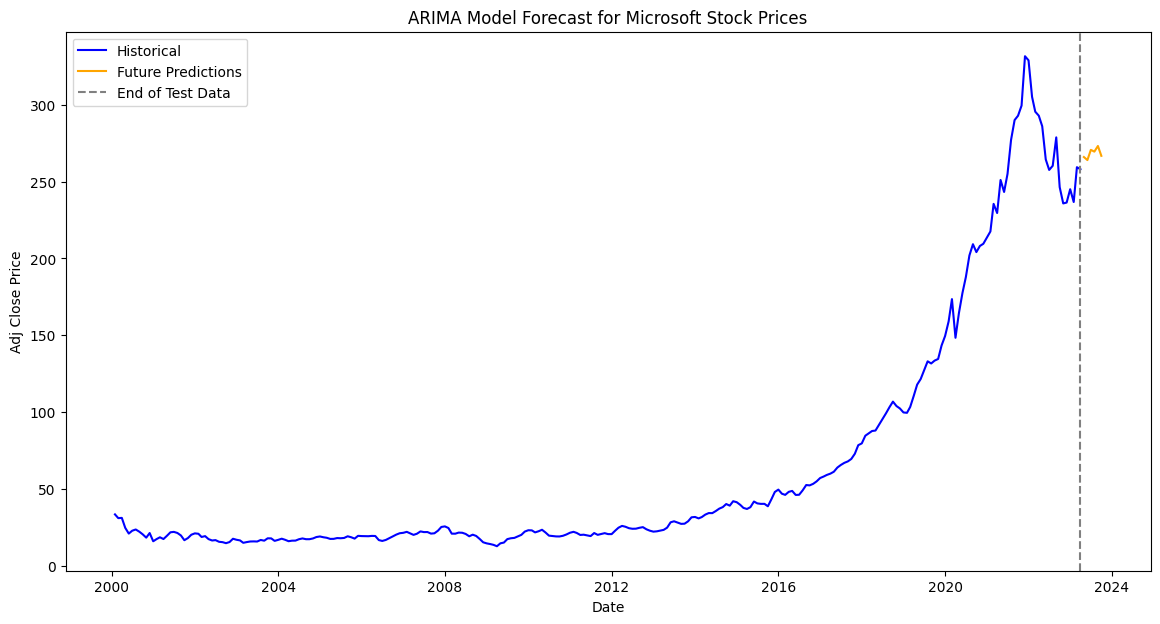

/Users/air/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


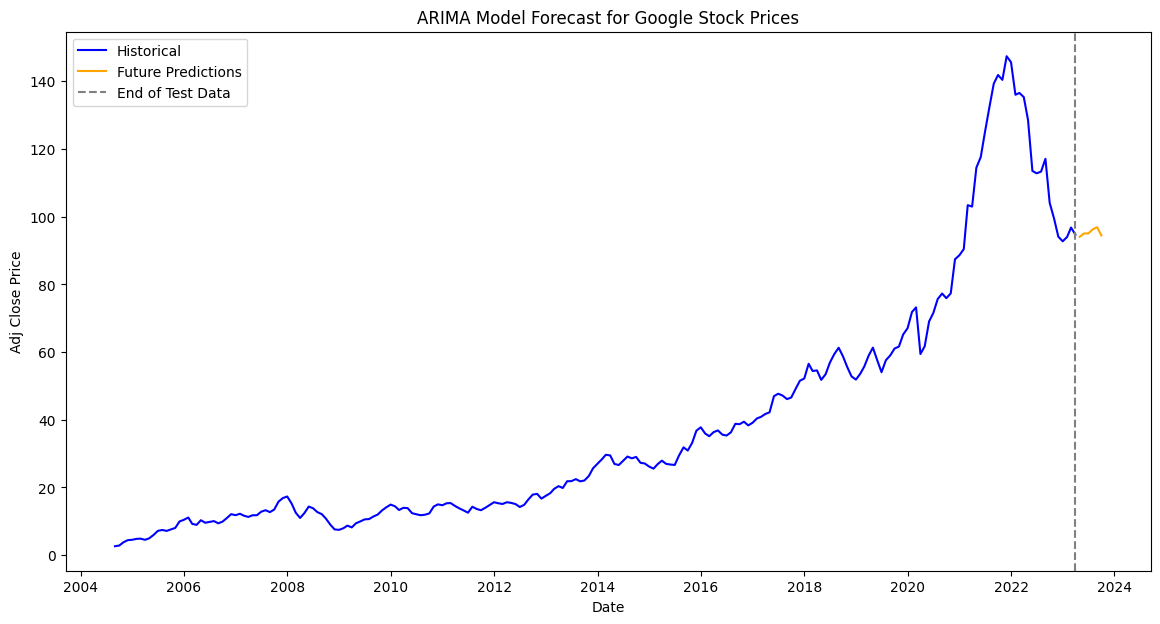

In [57]:


def forecast_stock(stock_prices, stock_name, order=(5, 1, 4), seasonal_order=(2, 0, 0, 12), future_periods=6):
    
  

    # Fit ARIMA model
    model = ARIMA(stock_prices, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit()

    # Make predictions on the test set
    predictions = model_fit.predict(start=len(stock_prices), end=len(stock_prices) + 6, typ='levels')


    # Evaluate the model on the test set
   ## rmse = np.sqrt(mean_squared_error(test, predictions))
    #print(f'Root Mean Squared Error (RMSE) on Test Set for {stock_name}: {rmse}')

    
    future_predictions = model_fit.get_forecast(steps=future_periods)

    
    plt.figure(figsize=(14, 7))

    # Plot training and test data
    plt.plot(stock_prices, label='Historical', color='blue')
    #plt.plot(predictions, label='Pred', color='green')

    # Plot future predictions
    #future_index = pd.date_range(start=test.index[-1], periods=future_periods + 1, freq='M')[1:]  # Assuming monthly frequency
    plt.plot( future_predictions.predicted_mean, label='Future Predictions', color='orange')

   
    plt.axvline(test.index[-1], color='gray', linestyle='--', label='End of Test Data')

    plt.title(f'ARIMA Model Forecast for {stock_name} Stock Prices')
    plt.xlabel('Date')
    plt.ylabel('Adj Close Price')
    plt.legend()
    plt.show()


stocks = {
    "Netflix": netflix_price,
    "Amazon": amazon_price,
    "Apple": apple_price,
    "Microsoft": microsoft_price, 
    "Google": google_price
}

for stock_name, stock_prices in stocks.items():
    forecast_stock(stock_prices, stock_name)
